# DNA Structure Generation Tutorial

Welcome to the DNA structure generation tutorial using the MDNA module. This notebook will guide you through various ways to generate and manipulate DNA structures. You'll learn to:
- Generate DNA sequences from scratch.
- Use custom sequences and define DNA topology to manipulate the linking number
- Apply custom shapes using control points
- Visualize and save DNA structures.


In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import nglview as nv
import seaborn as sns

import mdna

In [2]:
# Optional during development: reload local mdna modules after source edits
import importlib
import mdna.nucleic as _mdna_nucleic
importlib.reload(_mdna_nucleic)
importlib.reload(mdna)
print('Reloaded:', _mdna_nucleic.__file__)

Reloaded: /Users/thor/surfdrive/Projects/mdna/mdna/nucleic.py


## Basic DNA Structure Generation
We start by generating a basic DNA structure using default settings, which outputs a DNA sequence known as the Drew Dickerson dodecamer.

In [3]:
# Build DNA with nothing, will output Drew Dickerson dodecamer DDD sequence
dna = mdna.make()
dna.describe()

Default sequence: CGCGAATTCGCG
Number of base pairs: 12 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 12

DNA structure with 12 base pairs
Sequence: CGCGAATTCGCG
Trajectory not loaded
Frames:  (12, 1, 4, 3)


In [4]:
view = nv.show_mdtraj(dna.get_traj().atom_slice(dna.get_traj().top.select('resid 1 22')))
view

NGLWidget()

### Specifying a Sequence
You can specify a DNA sequence directly when generating the structure. Note, this will by default generate a linear strand of DNA.

In [5]:
# Or provide a sequence
dna = mdna.make(sequence='GCGCGCGCGC')
dna.describe()


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 10

DNA structure with 10 base pairs
Sequence: GCGCGCGCGC
Trajectory not loaded
Frames:  (10, 1, 4, 3)


### Generating DNA with Specific Base Pairs
Generate a DNA structure with a defined number of base pairs, resulting in a random sequence.

In [6]:
# Or provide a number of basepairs, resulting in a random sequence
dna = mdna.make(n_bp=10)
dna.describe()

Random sequence: TTTTTAAACG 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 10

DNA structure with 10 base pairs
Sequence: TTTTTAAACG
Trajectory not loaded
Frames:  (10, 1, 4, 3)


### Creating Circular DNA Structures
Generate circular DNA structures, commonly known as minicircles.

Random sequence: GGAAGGTTTCTCCTCTCCGGTTTATGCACGCCGAAACTTATTTGGATAACATCCGTTAGTAATGGGCCGACGGCTGCCGGCGCCGGTTGGGTGGTGTGTAACCGATCCATCCTTACTTTGGCTAGCGTTAACGTTAGATTAAGCAGCATCTACGAGTAGATACTTACTATCAGCTGCAATGAATATGACACCCGCAGATA 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 200

Structure is requested to be circular:
	Excess twist per base to make ends meet: 1.71 degrees
	New twist angle per base pair: 36.0 

using cython
Lk, Wr, Tw [20.  0. 20.]


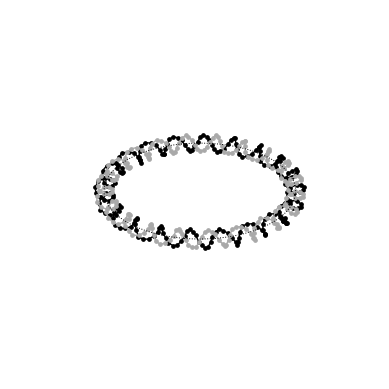

In [7]:
# Or make a minicircle DNA in circular form
dna = mdna.make(n_bp=200, circular=True)

dna.draw()
print('Lk, Wr, Tw', dna.get_linking_number())

#### Minimizing the DNA structure

After generating the structure, you can minimize it to find a more energetically favorable conformation. The resulting structure is an idealized minicircle, however, if we can also minimize the DNA configuration using Monte Carlo (MC) simulations using a twistable worm like chain (TWLC) model of dsDNA. 


Minimize the DNA structure:
simple equilibration = False 
equilibrate writhe = False 
excluded volume radius = 2.0 
temperature = 300
Circular: True
####################################
Initiating Excluded Volume...
EV_bead mismatch: including additional boundary checks.

######################################
#### INITIALIZING EXCLUDED VOLUME ####
######################################
 Excluded Volume Beads: 
   number of EV beads: 29
   bp per EV bead:     7
   Effective size:     3.57
   Exclusion distance: 4.0
######################################


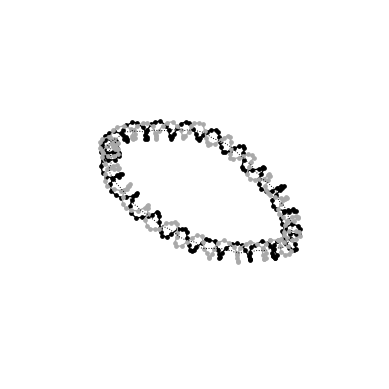

In [8]:
# Let's also minimize the DNA configuration
dna.minimize()

# See the final configuration
dna.draw()

# Or save it to a file
dna.save_pdb('./pdbs/minimized_nbp_200_closed')

### Modifying Linking Number
Change the linking number by underwinding or overwinding the DNA using the `dLk` parameter. Note, to equilibrate the writhe use `equilibrate_writhe=True`, otherwise the linking number of the topology will not be conserved.

In [9]:
# Also change the linking number by under or overwinding the DNA using the dLk parameter
dna = mdna.make(n_bp=200, circular=True, dLk=8)
dna.describe()
dna.get_linking_number()

# Minimize the DNA configuration,
dna.minimize(equilibrate_writhe=True)
dna.get_linking_number()

Random sequence: CTTGGCAACGTACTTAGATGTAGGACGAAGTTGCGACCTTCCACGCTTTTCACATTTCCGTATCGCGACCGCATTGATGCCAGCAGACCCCCCCTCGCCGAGAACAGTCATGCGATGTAAATGTCAACAAAGTGACAACTCGTCCTAACCACGGGTGGGGGTATTGTCGACGACTTGATTATCCAGGGCACTACAGGCTC 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 200

Structure is requested to be circular:
	Excess twist per base to make ends meet: 1.71 degrees
	New twist angle per base pair: 36.0 

Adjusting twist angles to match the given Delta linking number: 8
	Current twist number: 20.00
	Old twist angle per base pair: 36.00 degrees
	Adjusted twist angle per base pair: 50.40 degrees

Circular DNA structure with 200 base pairs
Sequence: CTTGGCAACGTACTTAGATGTAGGACGAAGTTGCGACCTTCCACGCTTTTCACATTTCCGTATCGCGACCGCATTGATGCCAGCAGACCCCCCCTCGCCGAGAACAGTCATGCGATGTAAATGTCAACAAAGTGACAACTCGTCCTAACCACGGGTGGGGGTATTGTCGACGACTTGATT

array([28.        ,  2.35965124, 25.64034876])

## Visualizing DNA Minimization
Use NGLview to visualize molecular dynamics and in our case the results of Monte Carlo minimization.

In [10]:
# visualize using nglview MC minimization
mc_traj = dna.get_MC_traj()
view = nv.show_mdtraj(mc_traj)
view.clear()
view.add_ball_and_stick()
view

NGLWidget(max_frame=960)

## Using Custom Shapes 
Explore the use of custom shapes for DNA structures through control points, allowing complex configurations. The `Shapes` class contains many predefined parametric functions that describe common shapes in 3D space. Utilize custom shapes for DNA structure generation, including helical shapes and more. 

Random sequence: CTAGTGAATAGGTTCTAGGCAAGACTCGCTAATACTTCTAGTGGCGCTCAGTATAGGCGGACTTGAACCCATGAGCTGATCCTAGAAGGACTCCTGGCCGTAGGGGGACGTGTCTAACGGGCAATCTTGGGAGGTGTGGGGTAGTGTATCCGCTGCACCACCGCTTGGGCATCTCATCGTCATGCTGGCGGGTCAACGACCGTTGAGACCTGTTTGTTCGGTAAATGACGGAAAGCTCTCTCACGAGACCGCTACTACTCTGGTGGTAGCAATCGAGCTGCTTTCGGTAACAGCGTGATC 




Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 300



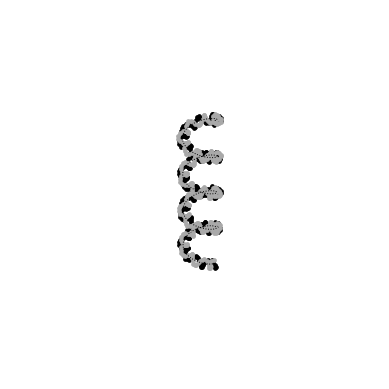

In [11]:
# We can also use custom shapes using the Shape class
control_points = mdna.Shapes.helix(height=3, pitch=5, radius=7, num_turns=4)
dna = mdna.make(n_bp=300, control_points=control_points)
dna.draw()

### Defining Complex Custom Shapes
Define intricate shapes by specifying control points manually. The points are used to fit a B-spline that goes through each of these points. Note, the minimum number of `control_points` to fit a spline through is 4.


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 100

DNA structure with 100 base pairs
Sequence: AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
Trajectory: <mdtraj.Trajectory with 1 frames, 4100 atoms, 200 residues, without unitcells>
Frames:  (100, 1, 4, 3)


'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA'

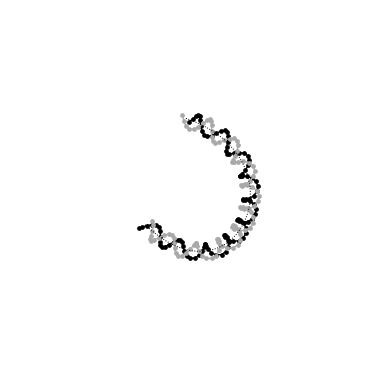

In [12]:
# Or use the control points to define a custom shape
control_points = np.array([[0,0,0],[30,10,-10],[50,10,20],[20,4,60]])
dna = mdna.make(n_bp=100, control_points=control_points, sequence=['A']*100)
dna.draw()
dna.describe()
dna.sequence

## Extending DNA Sequences
We can use the custom shaped DNA structure to learn how to extend DNA sequences from both ends. By default the minimization is on using the `.extend()` function.

Minimize the DNA structure:
simple equilibration = False 
equilibrate writhe = False 
excluded volume radius = 2.0 
temperature = 300
Circular: False
####################################
Initiating Excluded Volume...

######################################
#### INITIALIZING EXCLUDED VOLUME ####
######################################
 Excluded Volume Beads: 
   number of EV beads: 20
   bp per EV bead:     7
   Effective size:     3.573
   Exclusion distance: 4.0
######################################
Minimize the DNA structure:
simple equilibration = False 
equilibrate writhe = False 
excluded volume radius = 2.0 
temperature = 300
Circular: False
####################################
Initiating Excluded Volume...

######################################
#### INITIALIZING EXCLUDED VOLUME ####
######################################
 Excluded Volume Beads: 
   number of EV beads: 26
   bp per EV bead:     7
   Effective size:     3.583
   Exclusion distance: 4.0
###########################

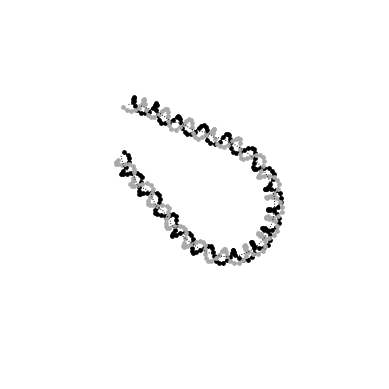

In [13]:
# We can also extend our DNA 
dna.extend(sequence=['G']*40)

# Or extend it in the opposite direction
dna.extend(sequence=['C']*40, forward=False)
dna.draw()

## Connecting Two DNA Strands
Connect two separate DNA strands and visualize the configuration. This function will find the optimal number of basepairs to connect the two strands to minimize the twist. Alternatively you can also pass the `n_bp` or `control_points`.


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 9


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 9

Optimal BP: 54, Twist Difference per BP: 0.002 degrees
Optimal number of base pairs: 54

Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 56

Random sequence: GCTCTTGGACGCAACATTTAACAGGCTGTAAATTTGGCCGTTAACAATCCTAAG 

Minimize the DNA structure:
simple equilibration = False 
equilibrate writhe = False 
excluded volume radius = 0.0 
temperature = 300
Circular: False
DNA structure with 72 base pai

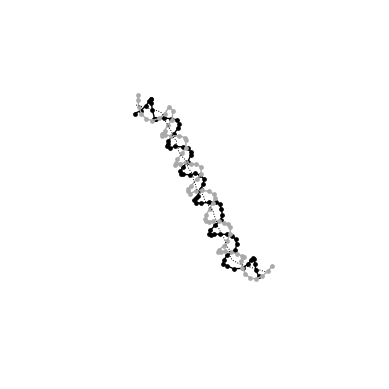

In [14]:
# Lets generate two strands of DNA and displace the second one away from the first one
dna0 = mdna.make(sequence='AAAAAAAAA', control_points=mdna.Shapes.line(1))
dna1 = mdna.make(sequence='GGGGGGGGG', control_points=mdna.Shapes.line(1)+np.array([4,0,-5]))

# Now we can connect the two strands
dna2 = mdna.connect(dna0, dna1)
dna2.draw()
dna2.describe()

## Understanding `make()` Decision Logic

The behavior of `mdna.make()` depends on which inputs are provided (`sequence`, `n_bp`, `control_points`, `circular`).
The next cells run a set of representative scenarios and visualize how those inputs resolve into the final DNA object.
For `control_points`-only input (`sequence=None`, `n_bp=None`), the number of base pairs is inferred from the spline/frame spacing (shape-dependent), not from the default dodecamer.

Scenarios include:
- default call (no inputs)
- sequence only
- n_bp only
- control points only (infer `n_bp`)
- control points + sequence
- control points + `n_bp`
- matching `sequence` + `n_bp`
- circular template
- mismatched `sequence` + `n_bp` (expected error)

In [15]:
# Decision-matrix scenarios for mdna.make()
import pandas as pd

control_points_demo = np.array([
    [0.0, 0.0, 0.0],
    [0.5, 0.2, 0.2],
    [1.0, 0.4, 0.0],
    [1.5, 0.0, -0.2],
])*10

scenarios = [
    ('default', {}),
    ('sequence_only', {'sequence': 'GCGCGCGCGC'}),
    ('n_bp_only', {'n_bp': 14}),
    ('control_points_only', {'control_points': control_points_demo}),
    ('control_points_sequence', {'control_points': control_points_demo, 'sequence': 'ATGCATGCATGC'}),
    ('control_points_n_bp', {'control_points': control_points_demo, 'n_bp': 18}),
    ('sequence_n_bp_match', {'sequence': 'ATGCATGC', 'n_bp': 8}),
    ('circular_template', {'n_bp': 24, 'circular': True}),
    ('sequence_n_bp_mismatch', {'sequence': 'ATGC', 'n_bp': 6}),
]

rows = []
for label, kwargs in scenarios:
    row = {
        'scenario': label,
        'has_sequence': int('sequence' in kwargs and kwargs['sequence'] is not None),
        'has_n_bp': int('n_bp' in kwargs and kwargs['n_bp'] is not None),
        'has_control_points': int('control_points' in kwargs and kwargs['control_points'] is not None),
        'circular': int(kwargs.get('circular', False)),
    }
    try:
        dna_case = mdna.make(**kwargs)
        row.update({
            'status': 'ok',
            'resolved_n_bp': dna_case.n_bp,
            'sequence_len': len(dna_case.sequence),
            'resolved_circular': int(dna_case.circular),
        })
    except Exception as exc:
        row.update({
            'status': f'error: {type(exc).__name__}',
            'resolved_n_bp': np.nan,
            'sequence_len': np.nan,
            'resolved_circular': np.nan,
        })
    rows.append(row)

decision_df = pd.DataFrame(rows)
decision_df

Default sequence: CGCGAATTCGCG
Number of base pairs: 12 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 12


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 10

Random sequence: GGCTCATATCGCGA 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 14

Random sequence: GGCTTTGGCCATCCCTTGGGGTCTCAGTATGCTCAACCTATCATGTCTACTGGGGAT 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scal

,scenario,has_sequence,has_n_bp,has_control_points,circular,status,resolved_n_bp,sequence_len,resolved_circular
0,default,0,0,0,0,ok,12.0,12.0,0.0
1,sequence_only,1,0,0,0,ok,10.0,10.0,0.0
2,n_bp_only,0,1,0,0,ok,14.0,14.0,0.0
3,control_points_only,0,0,1,0,ok,57.0,57.0,0.0
4,control_points_sequence,1,0,1,0,ok,12.0,12.0,0.0
5,control_points_n_bp,0,1,1,0,ok,18.0,18.0,0.0
6,sequence_n_bp_match,1,1,0,0,ok,8.0,8.0,0.0
7,circular_template,0,1,0,1,ok,24.0,24.0,1.0
8,sequence_n_bp_mismatch,1,1,0,0,error: ValueError,NaN,NaN,NaN


,scenario,status,resolved_n_bp,sequence_len,resolved_circular
0,default,ok,12.0,12.0,0.0
1,sequence_only,ok,10.0,10.0,0.0
2,n_bp_only,ok,14.0,14.0,0.0
3,control_points_only,ok,57.0,57.0,0.0
4,control_points_sequence,ok,12.0,12.0,0.0
5,control_points_n_bp,ok,18.0,18.0,0.0
6,sequence_n_bp_match,ok,8.0,8.0,0.0
7,circular_template,ok,24.0,24.0,1.0
8,sequence_n_bp_mismatch,error: ValueError,NaN,NaN,NaN


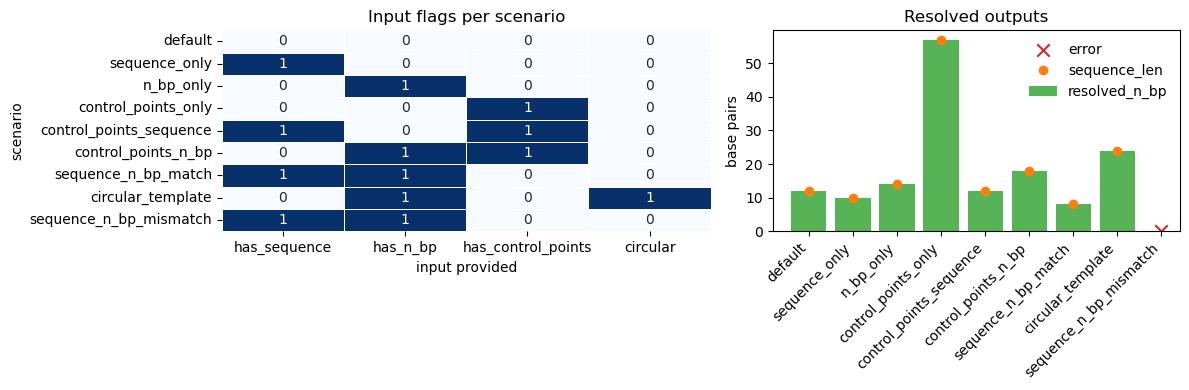

In [16]:
# Visualize inputs -> outcomes for make() scenarios
input_cols = ['has_sequence', 'has_n_bp', 'has_control_points', 'circular']

fig, axes = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [1.2, 1]})

# Left: input decision matrix
sns.heatmap(
    decision_df[input_cols],
    ax=axes[0],
    cmap='Blues',
    cbar=False,
    linewidths=0.5,
    linecolor='white',
    annot=True,
    fmt='.0f',
    yticklabels=decision_df['scenario']
 )
axes[0].set_title('Input flags per scenario')
axes[0].set_xlabel('input provided')
axes[0].set_ylabel('scenario')

# Right: resolved size and status
resolved = decision_df.copy()
ok_mask = resolved['status'].eq('ok')
x = np.arange(len(resolved))

axes[1].bar(x[ok_mask], resolved.loc[ok_mask, 'resolved_n_bp'], color='tab:green', alpha=0.8, label='resolved_n_bp')
if (~ok_mask).any():
    axes[1].scatter(x[~ok_mask], np.zeros((~ok_mask).sum()), color='tab:red', marker='x', s=80, label='error')

axes[1].plot(x[ok_mask], resolved.loc[ok_mask, 'sequence_len'], 'o', color='tab:orange', label='sequence_len')
axes[1].set_xticks(x)
axes[1].set_xticklabels(resolved['scenario'], rotation=45, ha='right')
axes[1].set_ylabel('base pairs')
axes[1].set_title('Resolved outputs')
axes[1].legend(frameon=False)

fig.tight_layout()

decision_df[['scenario', 'status', 'resolved_n_bp', 'sequence_len', 'resolved_circular']]

### Molecular visualization of `make()` decision outcomes

Use the selector below to interactively compare 3D structures produced by different `make()` input combinations.
This makes it easier to connect the decision matrix to actual structural outcomes.

In [17]:
# Interactive molecular viewer for representative make() scenarios
import ipywidgets as widgets
from IPython.display import display

viz_scenarios = {
    'default': {},
    'sequence_only': {'sequence': 'GCGCGCGCGC'},
    'n_bp_only': {'n_bp': 14},
    'control_points_only': {'control_points': control_points_demo},
    'control_points + sequence': {'control_points': control_points_demo, 'sequence': 'ATGCATGCATGC'},
    'control_points + n_bp': {'control_points': control_points_demo, 'n_bp': 18},
    'circular_template': {'n_bp': 24, 'circular': True},
}

viz_dna = {name: mdna.make(**kwargs) for name, kwargs in viz_scenarios.items()}

selector = widgets.Dropdown(
    options=list(viz_dna.keys()),
    value='default',
    description='scenario:',
    layout=widgets.Layout(width='420px')
)
out = widgets.Output()

def render_case(change=None):
    with out:
        out.clear_output(wait=True)
        case_name = selector.value
        dna_case = viz_dna[case_name]
        traj_case = dna_case.get_traj()
        view_case = nv.show_mdtraj(traj_case)
        view_case.clear_representations()
        view_case.add_cartoon(color='residueindex')
        view_case.add_licorice()
        display(view_case)
        print(f"scenario={case_name} | n_bp={dna_case.n_bp} | circular={dna_case.circular} | sequence_length={len(dna_case.sequence)}")

selector.observe(render_case, names='value')
render_case()
widgets.VBox([selector, out])

Default sequence: CGCGAATTCGCG
Number of base pairs: 12 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 12


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 10

Random sequence: GTTACTACAGCGCT 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 14

Random sequence: GGAGCTTTTGTTGACAGATCGAAATGAACTCAACCAGTCGACTCCCTCATGAAGGGA 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scal